In [1]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import pandas as pd
from scipy import optimize
from mpl_toolkits.mplot3d import Axes3D
import math
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
from scipy import stats
%matplotlib inline

###  2D minimization of a six-hump camelback function


has multiple global and local minima.
* Find the global minima of this function
* How many global minima are there, and what is the function value at those points?
* What happens for an initial guess of $(x,y) = (0,0)$?

Hints: 
* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$,
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.
   

Text(0.5, 0.92, 'Six-hump Camelback function')

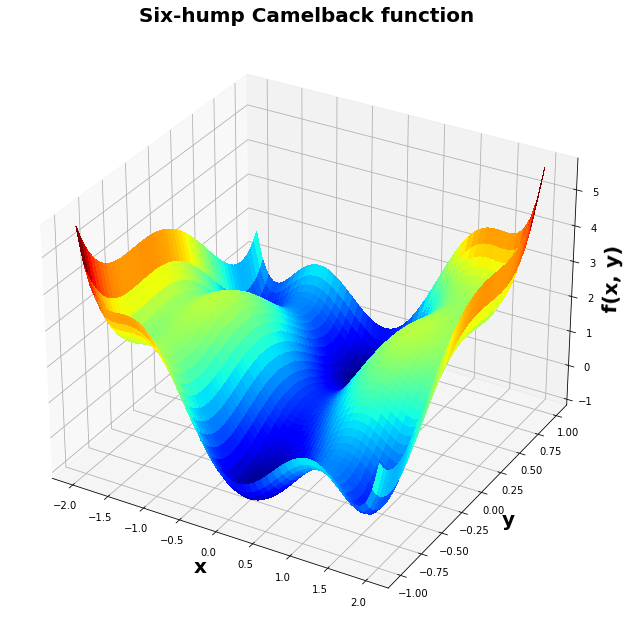

In [4]:
def sixhump(x):
    return ((4 - 2.1*x[0]**2 + x[0]**4 / 3.) * x[0]**2 + x[0] * x[1]
            + (-4 + 4*x[1]**2) * x[1] **2)

x = np.linspace(-2, 2)
y = np.linspace(-1, 1)
xg, yg = np.meshgrid(x, y)

fig = plt.figure(figsize=(11,11))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(xg, yg, sixhump([xg, yg]), rstride=1, cstride=1,
                       cmap=plt.cm.jet, linewidth=0, antialiased=False)

ax.set_xlabel('x',fontweight="bold",fontsize=20)
ax.set_ylabel('y',fontweight="bold",fontsize=20)
ax.set_zlabel('f(x, y)',fontweight="bold",fontsize=20)
ax.set_title('Six-hump Camelback function',fontweight="bold",fontsize=20)

The function has global minimum $f (x^{*}) = -1.0316$, at $x^{*}= (0.0898,-0.7126)$ and $(-0.0898, 0.7126)$.
In order to find them I have tried different methods.


##### Nelder-Mead method

In [7]:
optimize.minimize(sixhump, (1, 1), method = "Nelder-Mead")

 final_simplex: (array([[-0.08986599,  0.71268205],
       [-0.08980205,  0.71263734],
       [-0.08978193,  0.71269785]]), array([-1.03162845, -1.03162845, -1.03162842]))
           fun: -1.0316284464752081
       message: 'Optimization terminated successfully.'
          nfev: 77
           nit: 40
        status: 0
       success: True
             x: array([-0.08986599,  0.71268205])

In [8]:
optimize.minimize(sixhump, (0, 0), method = "Nelder-Mead")

 final_simplex: (array([[-0.08985145,  0.71266538],
       [-0.08980805,  0.71267176],
       [-0.08977995,  0.71263089]]), array([-1.03162845, -1.03162845, -1.03162843]))
           fun: -1.031628452567338
       message: 'Optimization terminated successfully.'
          nfev: 101
           nit: 52
        status: 0
       success: True
             x: array([-0.08985145,  0.71266538])

##### CG method

In [12]:
optimize.minimize(sixhump, (1, 1), method = "CG")

     fun: -1.0316284534898164
     jac: array([-4.91738319e-07,  1.20699406e-06])
 message: 'Optimization terminated successfully.'
    nfev: 63
     nit: 10
    njev: 21
  status: 0
 success: True
       x: array([ 0.08984193, -0.71265633])

In [16]:
optimize.minimize(sixhump, (0, 0), method = "CG")

     fun: 0.0
     jac: array([ 5.96046448e-08, -5.96046448e-08])
 message: 'Optimization terminated successfully.'
    nfev: 3
     nit: 0
    njev: 1
  status: 0
 success: True
       x: array([0., 0.])

#### Powell method

In [35]:
optimize.minimize(sixhump, (1, 1), method = "Powell")

   direc: array([[ 0.00000000e+00,  1.00000000e+00],
       [ 2.17782634e-03, -1.44126560e-04]])
     fun: -1.0316284534898565
 message: 'Optimization terminated successfully.'
    nfev: 84
     nit: 3
  status: 0
 success: True
       x: array([ 0.08984201, -0.71265645])

In [36]:
optimize.minimize(sixhump, (0, 0), method = "Powell")

   direc: array([[ 0.00000000e+00,  1.00000000e+00],
       [-6.21111406e-04,  4.70877838e-05]])
     fun: -1.0316284534898421
 message: 'Optimization terminated successfully.'
    nfev: 81
     nit: 3
  status: 0
 success: True
       x: array([-0.08984201,  0.71265634])

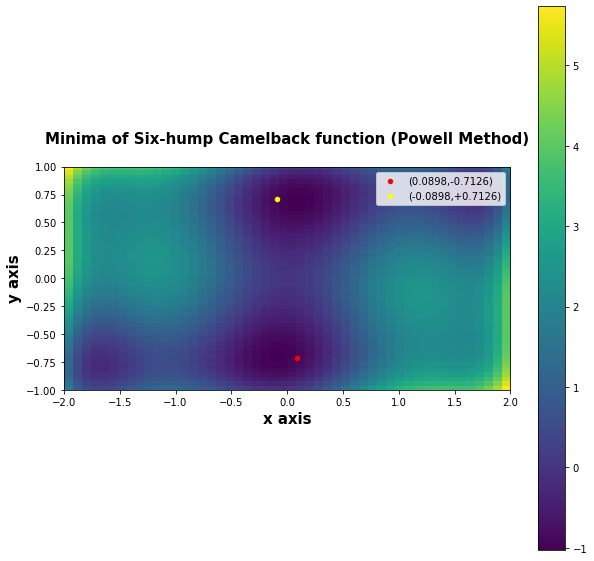

In [44]:
#Plot the two minima found w
x_min1 = optimize.minimize(sixhump, (1, 1), method = "Powell")
x_min2 = optimize.minimize(sixhump, (0, 0), method = "Powell")

#plt.figure()
plt.figure(figsize = (10,10))

# Show the function in 2D
plt.imshow(sixhump([xg, yg]), extent=[-2, 2, -1, 1])
plt.colorbar()
# And the minimum that we've found:
plt.scatter(x_min1.x[0], x_min1.x[1], s=20, color = "red",label="(0.0898,-0.7126)")
plt.scatter(x_min2.x[0], x_min2.x[1], s=20, color = "yellow",label="(-0.0898,+0.7126)")
plt.xlabel("x axis",fontweight="bold",fontsize=15)
plt.ylabel("y axis",fontweight="bold",fontsize=15)
plt.title("Minima of Six-hump Camelback function (Powell Method)\n",fontweight="bold",fontsize=15)
plt.legend(loc = "best")
plt.show()

* It's possible to notice that for an initial guess of $(x,y)=(0,0)$ the GC method isn't able to recognize the correct minima.
* For the Nelder-Mead method, regardless of the initial guess, the predicted minima is always $(x,y)=(-0.0898, 0.7126)$
* The Powell method instead predicts the two minima

### Curve fitting of temperature in Alaska

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max: 17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18

min: -62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58

* Plot these temperature extremes.
* Define a function that can describe min and max temperatures.
* Fit this function to the data with scipy.optimize.curve_fit().
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

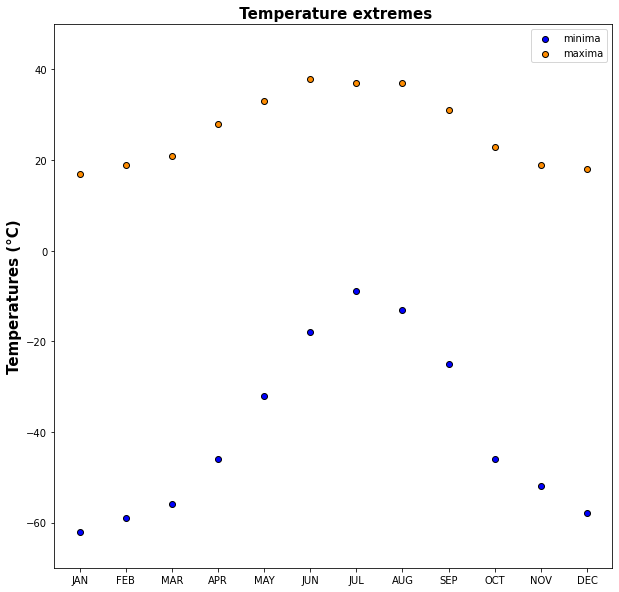

In [112]:
max = [17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18]
min = [-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]
month_dictionary= {'1':'JAN','2':'FEB','3':'MAR','4':'APR','5':'MAY','6':'JUN','7':'JUL','8':'AUG','9':'SEP','10':'OCT','11':'NOV','12':'DEC'}
months_names = list(month_dictionary.values())
months_number = list(month_dictionary.keys())

plt.figure(figsize=(10, 10))
plt.scatter(months_names,min, label = "minima",color = "blue",edgecolor="black")
plt.scatter(months_names,max, label = "maxima",color = "darkorange",edgecolor="black")
plt.ylabel("Temperatures (°C)",fontweight="bold",fontsize=15)
plt.ylim(-70,50)
plt.legend(loc="best")
plt.title(" Temperature extremes",fontweight="bold",fontsize=15)
plt.show()

In [7]:
def gauss(x, mu, std, a):
     return a*np.exp(-0.5*(x-mu)**2/(std**2))/np.sqrt(2*np.pi*std)

In [8]:
#optimization for max temperature
max_popt, max_pcov = curve_fit(gauss, months_number,np.array(max)-17)
mu_max, std_max, a_max = max_popt

#optimization for min temperature
min_popt, min_pcov = curve_fit(gauss, months_number, np.array(min)+62)
mu_min, std_min, a_min = min_popt

<ipython-input-7-6931faa3bdd3>:2: RuntimeWarning: invalid value encountered in sqrt
  return a*np.exp(-0.5*(x-mu)**2/(std**2))/np.sqrt(2*np.pi*std)


In [9]:
print("The best-fit values of the parameters for min temperatures are:")
print("mu = %.2f +- %.2f" % (min_popt[0], np.sqrt(min_pcov[0,0])))
print("std = %.2f +- %.2f" % (min_popt[1], np.sqrt(min_pcov[1,1])))
print("a = %.2f +- %.2f" % (min_popt[2], np.sqrt(min_pcov[2,2])))


print("\n\nThe best-fit values of the parameters for cold temperatures are:")
print("mu = %.2f +- %.2f" % (max_popt[0], np.sqrt(max_pcov[0,0])))
print("std = %.2f +- %.2f" % (max_popt[1], np.sqrt(max_pcov[1,1])))
print("a = %.2f +- %.2f" % (max_popt[2], np.sqrt(max_pcov[2,2])))

The best-fit values of the parameters for min temperatures are:
mu = 7.16 +- 0.05
std = 2.01 +- 0.05
a = 188.90 +- 3.01


The best-fit values of the parameters for cold temperatures are:
mu = 6.74 +- 0.08
std = 2.15 +- 0.08
a = 81.27 +- 2.19


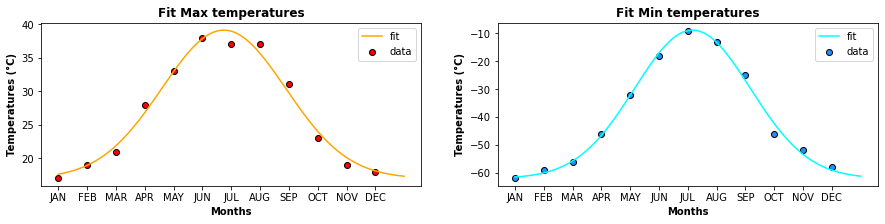

In [30]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))

x=np.linspace(0,12,400)

ax1.scatter(months_names, max, label = "data",color="red",edgecolor="black")
ax1.plot(x, gauss(x+1, mu_max, std_max, a_max)+17, label = "fit",color="orange")
ax1.set_title('Fit Max temperatures',fontweight="bold")
ax1.set_xlabel('Months',fontweight="bold")
ax1.set_ylabel("Temperatures (°C)",fontweight="bold")
ax1.legend(loc="best")

ax2.scatter(months_names, min, label = "data",color="dodgerblue",edgecolor="black")
ax2.plot(x, gauss(x+1, mu_min, std_min, a_min)-62,label = "fit",color="cyan")
ax2.set_title('Fit Min temperatures',fontweight="bold")
ax2.set_xlabel('Months',fontweight="bold")
ax2.set_ylabel("Temperatures (°C)",fontweight="bold")
ax2.legend(loc="best")

In [12]:
from scipy.stats import ttest_ind_from_stats
ttest_ind_from_stats(mu_max,std_max,len(max),mu_min,std_min,len(min))

Ttest_indResult(statistic=-0.49679384739554866, pvalue=0.6242624337812972)

We consider $\alpha = 0.05$, and our null hypotesis is:

$H_{0}: $ $\mu_{T_{min}}$ and $\mu_{T_{max}}$ differ from each other due to statistical fluctuations

Being the $p_{value} > \alpha$ there aren't reasons to reject the null hypotesis $H_{0}$

###  Fit the residues

Read the data/residuals_261.pkl file. If you haven't it already, download it from here:

wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
The feature name "residual" contains the residuals (defined as 
) of a linear regression as a function of the independent variable "distances".

* Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
* Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$ , where $n_i$ is the number of entries in each bin)
* By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
* Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

In [109]:
dataframe = np.load("residuals_261.pkl",allow_pickle="True")
data = pd.DataFrame(dataframe.item())

In [110]:
residuals = data["residuals"]

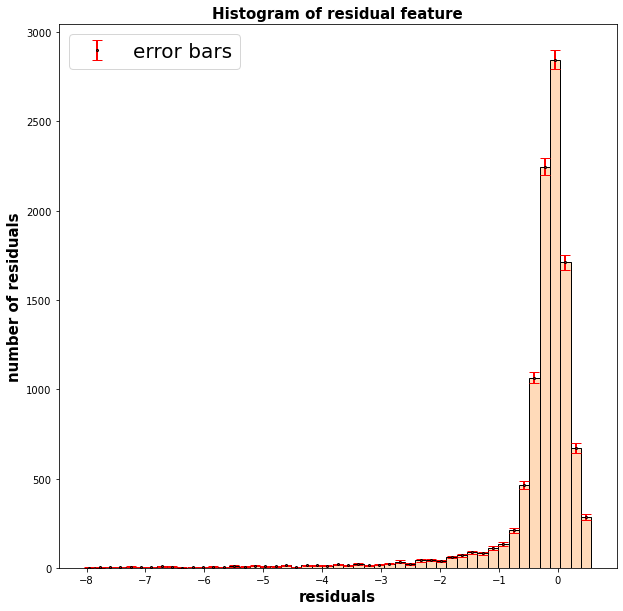

In [111]:
fig, ax = plt.subplots(figsize=(10,10))

#Here I create the histogram
m = data["residuals"].min()
M = data["residuals"].max()
a = ax.hist(residuals, bins=np.linspace(m/20, M/20, 50), color = "peachpuff",edgecolor="black")

poisson_uncertainty = a[0]**(1/2)
poisson_uncertainty = np.where(poisson_uncertainty == np.Inf, 0, poisson_uncertainty)
bin_centers = 0.5*(a[1][1:] + a[1][:-1])
ax.set_xlabel("residuals",fontweight="bold",fontsize=15)
ax.set_ylabel("number of residuals",fontweight="bold",fontsize=15)
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.errorbar(bin_centers, a[0], xerr=None, yerr=poisson_uncertainty, linestyle='None', fmt='.-r', markersize=4, linewidth=2, markeredgecolor='black', label='error bars', capsize = 5)
ax.set_title("Histogram of residual feature",fontweight="bold",fontsize=15)
ax.legend(loc="upper left",prop={'size': 20})

In [55]:
#I shrink the values of residuals wich are most populated
mask = (data["residuals"]>-2) & (data["residuals"]<2)

data = data[mask]

In [56]:
residuals = data["residuals"].tolist()

m = data["residuals"].min()
M = data["residuals"].max()


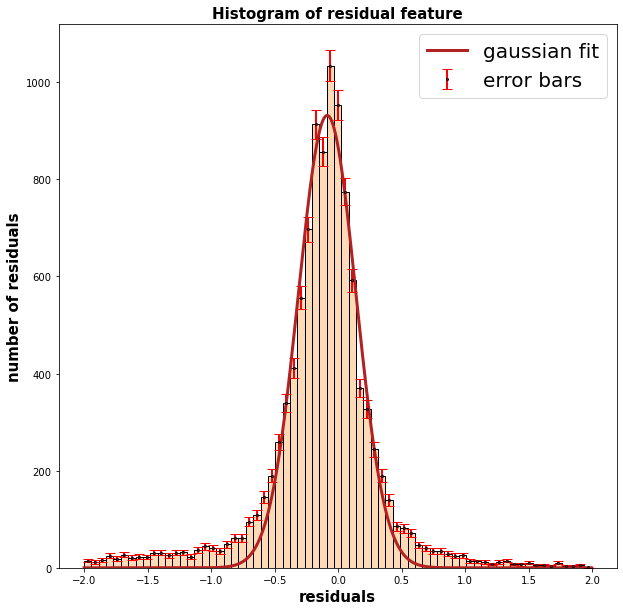

In [106]:
fig, ax = plt.subplots(figsize=(10,10))

#Here I create the histogram
m = data["residuals"].min()
M = data["residuals"].max()
a = ax.hist(residuals, bins=np.linspace(m, M, 70), color = "peachpuff",edgecolor="black")
ax.set_xlabel("residuals",fontweight="bold",fontsize=15)
ax.set_ylabel("number of residuals",fontweight="bold",fontsize=15)
ax.set_title("Histogram of residual feature",fontweight="bold",fontsize=15)

poisson_uncertainty = a[0]**(1/2)
poisson_uncertainty = np.where(poisson_uncertainty == np.Inf, 0, poisson_uncertainty)
bin_centers = 0.5*(a[1][1:] + a[1][:-1])

ax.errorbar(bin_centers, a[0], xerr=None, yerr=poisson_uncertainty, linestyle='None', fmt='.-r', markersize=4, linewidth=2, markeredgecolor='black', label='error bars', capsize = 5)
ax.plot(x_model, y_model, color='firebrick',linewidth=3.0, label="gaussian fit")
ax.legend(loc="best",prop={'size': 20})

In [25]:
#to fit the histogram of the residuals I have choosed a gaussian function
def gauss(x, mu, std, a):
     return a*np.exp(-0.5*(x-mu)**2/(std**2))/np.sqrt(2*np.pi*std)

In [26]:
popt, pcov = curve_fit(gauss, bin_centers, a[0], p0=[0, 1 ,1000])
mu_opt, std_opt, a_opt = popt
x_model = np.linspace(m, M, 1000)
y_model = gauss(x_model, mu_opt, std_opt, a_opt)

In [27]:
ssr = np.sum((a[0] - gauss(bin_centers, mu_opt, std_opt, a_opt))**2)
tss = np.sum((np.mean(a[0]) - a[0])**2)

rsq = 1 - ssr / tss

print("R2 =", rsq, "\nR =", np.sqrt(rsq))

R2 = 0.9755347398571893 
R = 0.9876916218421564


In [28]:
sigma = np.sqrt(np.abs(a[0])) 

ndof = len(bin_centers) - 1
print("n degrees of freedom =",ndof)


# calculate the chi^2
chi2 = np.sum(((a[0] - gauss(bin_centers, mu_opt, std_opt, a_opt))**2) / sigma**2)
print("chi2 =", chi2)

n degrees of freedom = 68
chi2 = 1335.9973241254631


In [29]:
# calculate the p-value from the chi^2, the n.d.o.f., and the comulative chi^2 distribution
pvalue = 1. - stats.chi2.cdf(chi2, ndof)
print("p-value =", pvalue) # if the p-value is < 0.05, the fit is considered unsatisfactory

p-value = 0.0


### Temperatures in Munich

Get the following data file:

https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
which gives the temperature in Munich every day for several years.

Fit the following function to the data: 


$f(t) = a cos (2 \pi t + b) + c$

where $t$ is the time in years.

* Make a plot of the data and the best-fit model in the range 2008 to 2012.



In [63]:
df = pd.read_csv('munich_temperatures_average_with_bad_data.txt',sep=" ",header=None)

In [64]:
df.columns = ['x', 'y']
mask = (df["y"]>-70) & (df["y"]<70)

df = df[mask]

In [65]:
x= df.x
y = df.y

In [66]:
x_data = x[(x>=2008) & (x<=2012)]
y_data = y[(x>=2008) & (x<=2012)]

Text(0, 0.5, '°C')

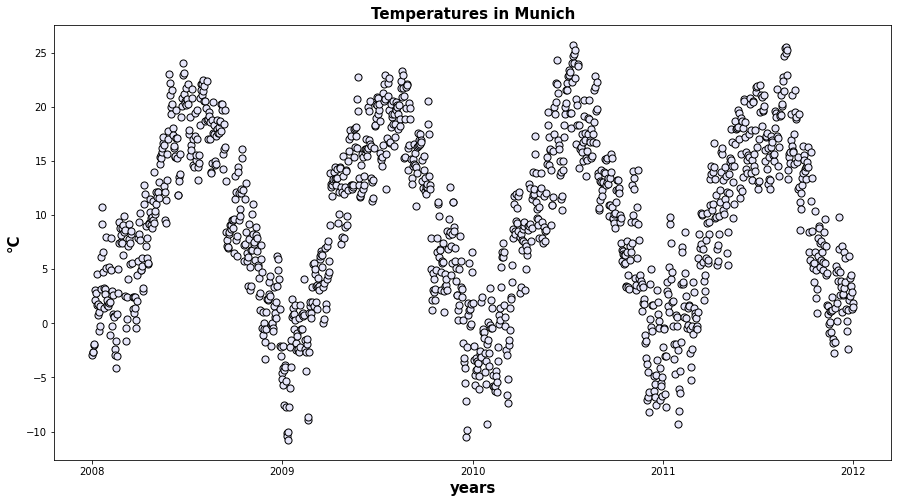

In [121]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,8))
ax.scatter(x_data, y_data, s=50, color = "lavender",edgecolor="black")
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(5))
ax.set_title('Temperatures in Munich', fontweight="bold",fontsize=15)
ax.set_xlabel('years',fontweight="bold",fontsize=15)
ax.set_ylabel('°C',fontweight="bold",fontsize=15)


In [68]:
def f(t,a,b,c):
    return a*np.cos(2*np.pi*t+b) + c

In [69]:
popt_f, pcov_f = curve_fit(f, x_data, y_data, p0=[30,1,1])

In [70]:
a_opt_f, b_opt_f, c_opt_f = popt_f
x_model_f = np.linspace(x_data.min(), x_data.max(), 1459)
y_model_f = f(x_model_f,a_opt_f, b_opt_f, c_opt_f)

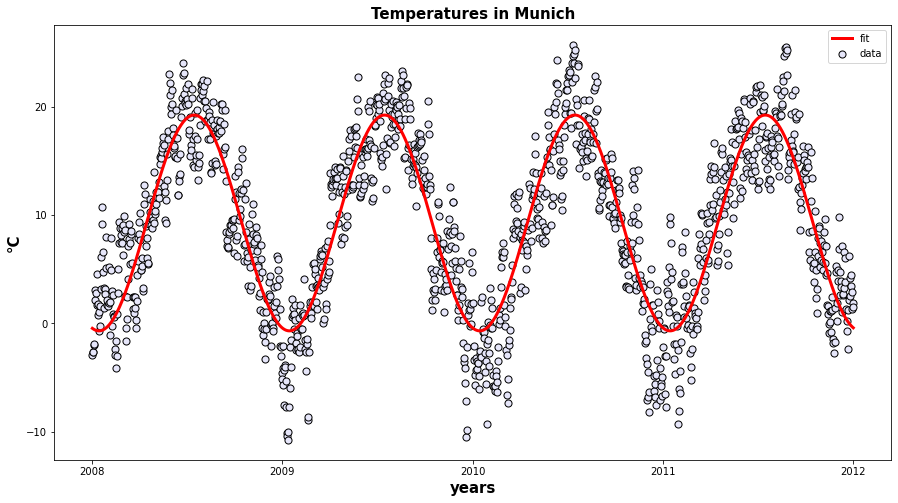

In [149]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,8))
ax.scatter(x_data, y_data, s=50, color = "lavender",edgecolor="black",label="data")
ax.plot(x_model_f, y_model_f, color='r', label = "fit",linewidth=3)
ax.xaxis.set_major_locator(MultipleLocator(2))
ax.yaxis.set_major_locator(MultipleLocator(10))
ax.set_title('Temperatures in Munich', fontweight="bold",fontsize=15)
ax.set_xlabel('years',fontweight="bold",fontsize=15)
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.set_ylabel('°C',fontweight="bold",fontsize=15)
ax.legend(loc='best')

What are the best-fit values of the parameters?

In [72]:
print("The best-fit values of the parameters are: \n\n",
      "a =",a_opt_f,"\n",
      "b =",b_opt_f,"\n",
      "c =",c_opt_f)

The best-fit values of the parameters are: 

 a = -9.962034680500352 
 b = -0.23462775696964763 
 c = 9.262821311452198


* the $\beta$ parameter is a temporal shift, and the physical sense is to shift the months for maximum and minimum temperatures

* What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

In [73]:
overall_average = np.sum(y_data)/len(y_data)
print("The overall average temperature in Munich is ",round(overall_average,1),"°C")

The overall average temperature in Munich is  9.3 °C


Now I select the temperatures for each year

In [74]:
x_data_2008 = x_data[(x_data>=2008) & (x_data<2009)]
y_data_2008 = y_data[(x_data>=2008) & (x_data<2009)]

x_data_2009 = x_data[(x_data>=2009) & (x_data<2010)]
y_data_2009 = y_data[(x_data>=2009) & (x_data<2010)]

x_data_2010 = x_data[(x_data>=2010) & (x_data<2011)]
y_data_2010 = y_data[(x_data>=2010) & (x_data<2011)]

x_data_2011 = x_data[(x_data>=2011) & (x_data<2012)]
y_data_2011 = y_data[(x_data>=2011) & (x_data<2012)]


In [75]:
year_2008 = pd.concat([x_data_2008, y_data_2008], axis=1)
year_2009 = pd.concat([x_data_2009, y_data_2009], axis=1)
year_2010 = pd.concat([x_data_2010, y_data_2010], axis=1)
year_2011= pd.concat([x_data_2011, y_data_2011], axis=1)


#year_2008.sort_values(by=['y'], inplace = True)
#year_2009.sort_values(by=['y'], inplace = True)
#year_2010.sort_values(by=['y'], inplace = True)
#year_2011.sort_values(by=['y'], inplace = True)

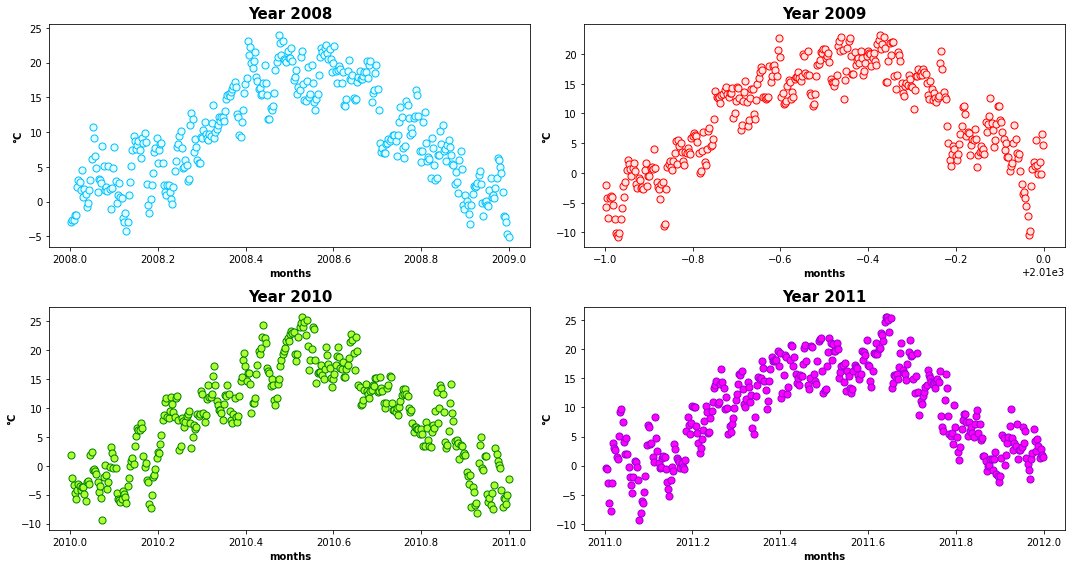

In [140]:
fig, ((ax1, ax2), (ax3, ax4))  = plt.subplots(nrows=2, ncols=2, figsize=(15,8))

ax1.scatter(x_data_2008, y_data_2008, s=50,color="lightcyan",edgecolor = "deepskyblue")
ax1.set_title('Year 2008', fontweight="bold",fontsize=15)
ax1.set_xlabel('months',fontweight="bold")
ax1.set_ylabel('°C',fontweight="bold")



ax2.scatter(x_data_2009, y_data_2009, s=50, edgecolor="red",color = "mistyrose")
ax2.set_title('Year 2009', fontweight="bold",fontsize=15)
ax2.set_xlabel('months',fontweight="bold")
ax2.set_ylabel('°C',fontweight="bold")


ax3.scatter(x_data_2010, y_data_2010, s=50, color = "greenyellow",edgecolor="green")
ax3.set_title('Year 2010', fontweight="bold",fontsize=15)
ax3.set_xlabel('months',fontweight="bold")
ax3.set_ylabel('°C',fontweight="bold")


ax4.scatter(x_data_2011, y_data_2011, s=50,edgecolor="darkviolet",color="fuchsia")
ax4.set_title('Year 2011', fontweight="bold",fontsize=15)
ax4.set_xlabel('months',fontweight="bold")
ax4.set_ylabel('°C',fontweight="bold")


fig.tight_layout()

 From this scatterplot it's possible to notice that the hottest month is July, wheras the coldest is January, so,for each year, I have selected this two months from the dataset, and then I have made an overall mean on the values

In [141]:
mask_hot_2008 = (year_2008["x"]>=2008.6) & (year_2008["x"]<2008.7)
hot_2008 = year_2008[mask_hot_2008]


mask_hot_2009 = (year_2009["x"]>=2009.6) & (year_2009["x"]<2009.7)
hot_2009 = year_2009[mask_hot_2009]


mask_hot_2010 = (year_2010["x"]>=2010.6) & (year_2010["x"]<2010.7)
hot_2010 = year_2010[mask_hot_2010]


mask_hot_2011 = (year_2011["x"]>=2011.6) & (year_2011["x"]<2011.7)
hot_2011 = year_2011[mask_hot_2011]





mask_cold_2008 = (year_2008["x"]>=2008.0) & (year_2008["x"]<2008.1)
cold_2008 = year_2008[mask_cold_2008]


mask_cold_2009 = (year_2009["x"]>=2009.0) & (year_2009["x"]<2009.1)
cold_2009 = year_2009[mask_cold_2009]


mask_cold_2010 = (year_2010["x"]>=2010.0) & (year_2010["x"]<2010.1)
cold_2010 = year_2010[mask_cold_2010]


mask_cold_2011 = (year_2011["x"]>=2011.0) & (year_2011["x"]<2011.1)
cold_2011 = year_2011[mask_cold_2011]




In [142]:
hot_predictions_2008 = f(hot_2008["x"],a_opt_f, b_opt_f, c_opt_f)
hot_predictions_2008 = hot_predictions_2008.sum()

hot_predictions_2009 = f(hot_2009["x"],a_opt_f, b_opt_f, c_opt_f)
hot_predictions_2009 = hot_predictions_2009.sum()

hot_predictions_2010 = f(hot_2010["x"],a_opt_f, b_opt_f, c_opt_f)
hot_predictions_2010 = hot_predictions_2010.sum()

hot_predictions_2011 = f(hot_2011["x"],a_opt_f, b_opt_f, c_opt_f)
hot_predictions_2011 = hot_predictions_2011.sum()


hot_predictions = ((hot_predictions_2008 + hot_predictions_2009 + hot_predictions_2010 + hot_predictions_2011))/(len(hot_2008) + len(hot_2009) + len(hot_2010) + len(hot_2011))

cold_predictions_2008 = f(cold_2008["x"],a_opt_f, b_opt_f, c_opt_f)
cold_predictions_2008 = cold_predictions_2008.sum()

cold_predictions_2009 = f(cold_2009["x"],a_opt_f, b_opt_f, c_opt_f)
cold_predictions_2009 = cold_predictions_2009.sum()

cold_predictions_2010 = f(cold_2010["x"],a_opt_f, b_opt_f, c_opt_f).sum()
cold_predictions_2010 = cold_predictions_2010.sum()

cold_predictions_2011 = f(cold_2011["x"],a_opt_f, b_opt_f, c_opt_f)
cold_predictions_2011 = cold_predictions_2011.sum()

cold_predictions = (cold_predictions_2008 + cold_predictions_2009 + cold_predictions_2010 + cold_predictions_2011)/(len(cold_2008) + len(cold_2009) + len(cold_2010) + len(cold_2011))



In [144]:
print("The typical daily average values predicted by the model for the coldest time of year is: ",round(cold_predictions,1),"°C\n")
print("The typical daily average values predicted by the model for the hottest time of year is: ",round(hot_predictions,1),"°C")

The typical daily average values predicted by the model for the coldest time of year is:  -0.5 °C

The typical daily average values predicted by the model for the hottest time of year is:  16.7 °C


* Now fit the data with the function $g(x)$ , which has $1$ more parameter than $f(x)$


 $ g(x) = a cos (2 \pi b t + c) + d $

In [145]:
def g(t,a,b,c,d):
    return a*np.cos(2*np.pi*t*b + c) + d

In [146]:
popt_g, pcov_g = curve_fit(g, x_data, y_data, p0=[10,1,1,5])

In [147]:
a_opt_g, b_opt_g, c_opt_g, d_opt_g = popt_g
x_model_g = np.linspace(x_data.min(), x_data.max(), 1459)
y_model_g = g(x_model_g, a_opt_g, b_opt_g, c_opt_g, d_opt_g)

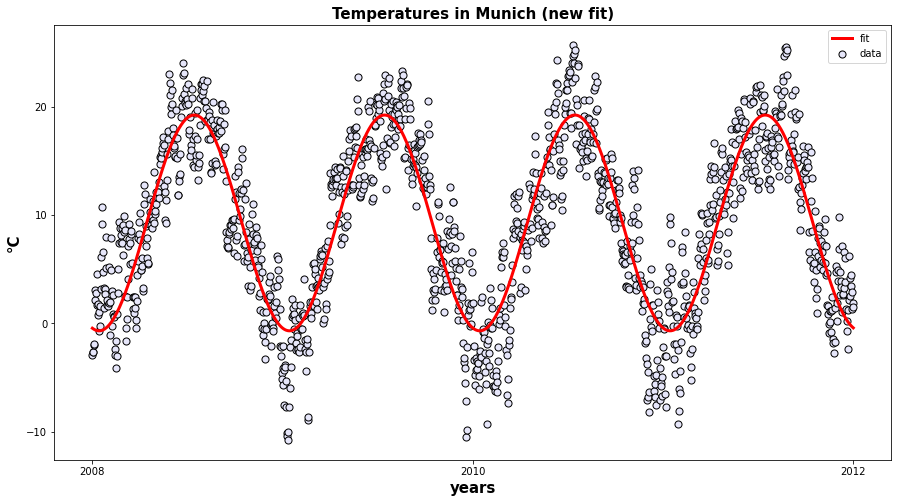

In [153]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,8))
ax.scatter(x_data, y_data, s=50, color = "lavender",edgecolor="black",label="data")
ax.plot(x_model_g, y_model_g, color='red', label = "fit",linewidth=3)
ax.xaxis.set_major_locator(MultipleLocator(2))
ax.yaxis.set_major_locator(MultipleLocator(10))
ax.set_title('Temperatures in Munich (new fit)', fontweight="bold",fontsize=15)
ax.set_xlabel('years',fontweight="bold",fontsize=15)
ax.set_ylabel('°C',fontweight="bold",fontsize=15)
ax.legend(loc='best')

In [84]:
print("The best-fit values of the parameters are: \n\n",
      "a =",a_opt_g,"\n",
      "b =",b_opt_g,"\n",
      "c =",c_opt_g,"\n",
      "d =",d_opt_g)

The best-fit values of the parameters are: 

 a = 9.960759886892804 
 b = 1.000293417396672 
 c = -0.7987695165872362 
 d = 9.265674152184637


* What are the RSS for $f(x)$ and $g(x)$ ?

In [85]:
RSS_f = np.sum((y_model_f - y_data)**2)
RSS_g = np.sum((y_model_g - y_data)**2)


print("Squared sum of the residuals of the fit f = ", round(RSS_f,3))
print("Squared sum of the residuals of the fit g = ",round(RSS_g,3))

Squared sum of the residuals of the fit f =  18655.287
Squared sum of the residuals of the fit g =  18654.831


In [86]:
ssr_f = np.sum((y - f(x,a_opt_f, b_opt_f, c_opt_f))**2)
tss_f = np.sum((np.mean(y) - y)**2)

rsq_f = 1 - ssr_f / tss_f

print("R2_f_function =", round(rsq_f,3), "\nR_f_function =", round(np.sqrt(rsq_f),3))

R2_f_function = 0.774 
R_f_function = 0.88


In [87]:
ssr_g = np.sum((y - g(x, a_opt_g, b_opt_g, c_opt_g, d_opt_g))**2)
tss_g = np.sum((np.mean(y) - y)**2)

rsq_g = 1 - ssr_g / tss_g

print("R2_g_function =", round(rsq_g,3), "\nR_g_function =", round(np.sqrt(rsq_g),3))

R2_g_function = 0.774 
R_g_function = 0.88


* Use the Fisher F-test to determine whether the additional parameter is necessary

In [88]:
def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=False):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    CL = 1. - stats.f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("CL: %.3f" % CL, ", additional parameter necessary:", "YES" if CL < 0.10 else "NO")
    return CL


In [89]:
ndof_f = 2
ndof_g = 3
N =  1461

print("Test f vs g:")
cl_1_vs_2 = Ftest(RSS_f, RSS_g, ndof_f, ndof_g, N, verbose = True)

Test f vs g:
CL: 0.850 , additional parameter necessary: NO
